In [1]:
from matplotlib.pyplot import draw, fill
import pyrender
import trimesh
from trimesh import remesh
import pandas as pd
import numpy as np
from trimesh import Trimesh
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import os
import pickle
import matplotlib.mlab as mlab
import seaborn as sns
import skeletor as sk
from view_data import view_mesh
import copy
from sklearn.preprocessing import MinMaxScaler
from project_statistics import get_outliers
from create_dataset import load_dataset,dir_to_sorted_file_list
from trimesh.repair import fill_holes
from trimesh.points import PointCloud
import ast
import random
from scipy.stats import wasserstein_distance
from random import choice

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [153]:
# labels = []
# for i in range(0,19):
#     if i==18:
#         labels.append(np.repeat(i,15))
#     elif i==7:
#         labels.append(np.repeat(i,99))
#     else:
#         labels.append(np.repeat(i,100))
# labels = np.concatenate(labels).ravel().tolist()

In [155]:
# normalized_data['class'] = labels

In [157]:
normalized_data.to_pickle("normalized_features_classes.pkl")

In [156]:
normalized_data

,id,surface_area,volume,compactness,sphericity,diameter,rectangulairty,eccentricity,curvature,A3,D1,D2,D3,D4,class
0,0,-0.583110,-0.039329,-0.116012,0.230250,1.0,-0.109650,-0.026311,"[0.0015568240788790867, 0.011416709911779968, ...","[0.23664198719878007, 0.22873653163185456, 0.1...","[0.04733241036136359, 0.12355785629727724, 0.1...","[0.09370171953690884, 0.19420534119865968, 0.2...","[0.20435803286582796, 0.15628323200706273, 0.1...","[0.13328919119565, 0.28198800136439334, 0.2750...",0
1,1,-0.640930,-0.415322,-0.118042,0.272779,1.0,0.097077,-0.026489,"[0.04924623115577889, 0.054773869346733665, 0....","[0.24772371746019012, 0.22417873330391883, 0.1...","[0.12446351931330472, 0.25626729774176726, 0.1...","[0.151618466968834, 0.300790180899282, 0.27189...","[0.3746741005174281, 0.28757370342144317, 0.16...","[0.07649111547872127, 0.2777064698568048, 0.32...",0
2,2,-0.603237,-0.095673,-0.118419,0.280905,1.0,-0.043228,-0.026263,"[0.015625, 0.03780241935483871, 0.137096774193...","[0.25301446542142325, 0.23644242922777522, 0.1...","[0.15300042132295408, 0.21009971309913128, 0.1...","[0.14629938005336757, 0.26599522500652045, 0.2...","[0.29506650883775054, 0.24288265152579097, 0.1...","[0.11953534097064783, 0.3514635956904681, 0.29...",0
3,3,-0.520618,0.392970,-0.119893,0.313312,1.0,-0.468747,-0.026398,"[0.011866235167206042, 0.02481121898597627, 0....","[0.20333848283610537, 0.23802740605501274, 0.1...","[0.05069919547378769, 0.09237004193166543, 0.0...","[0.061753907268824106, 0.1599622815641113, 0.1...","[0.1285636899865578, 0.1484260578215597, 0.138...","[0.08151596011476035, 0.2712316674357482, 0.31...",0
4,4,-0.724641,-0.475575,-0.095315,-0.114249,1.0,-0.306213,-0.026249,"[0.06380952380952382, 0.10952380952380952, 0.2...","[0.2399117529081428, 0.2335138387484958, 0.155...","[0.17721620537505015, 0.18864821500200563, 0.2...","[0.1078018451664661, 0.2600882470918572, 0.267...","[0.2778780585639791, 0.25130365022061774, 0.16...","[0.07882069795427196, 0.2884476534296029, 0.31...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,1809,-0.365028,-0.011320,-0.113034,0.171236,1.0,-0.081913,-0.026487,"[0.08372530573847602, 0.009877704609595485, 0....","[0.1711191335740072, 0.23331327717609307, 0.20...","[0.10609707180104291, 0.027476935419173686, 0....","[0.10146409947853992, 0.1478740473325311, 0.25...","[0.1829121540312876, 0.11217408744484557, 0.09...","[0.07059767348576013, 0.20198555956678702, 0.2...",18
1810,1810,-0.089583,0.813581,-0.138504,0.844492,1.0,-0.125955,-0.026451,"[0.0903030303030303, 0.15575757575757576, 0.38...","[0.16446496687412165, 0.24053402931138326, 0.2...","[0.18598674964866493, 0.2187111021883156, 0.21...","[0.07153182091949407, 0.1783778357759486, 0.24...","[0.13278458140935556, 0.1505320216823931, 0.14...","[0.08239309375627384, 0.27639028307568764, 0.3...",18
1811,1811,-0.509943,-0.716180,-0.046532,-0.572259,1.0,-0.403390,-0.026294,"[0.008452192287374538, 0.0306391970417327, 0.0...","[0.2840779153042187, 0.1652189612630143, 0.140...","[0.1258199763285121, 0.4619952255812554, 0.094...","[0.25559188750025075, 0.2389616642259624, 0.12...","[0.4473911211859817, 0.21958314108607996, 0.13...","[0.10658187726935345, 0.2844189452145479, 0.28...",18
1812,1812,0.413064,1.070660,-0.142995,1.019764,1.0,-0.306231,-0.026260,"[0.1552892131318395, 0.26003126628452317, 0.28...","[0.23453768531707023, 0.2171845848295785, 0.16...","[0.06275202118482556, 0.09860172126707725, 0.1...","[0.15445262503259977, 0.1181415130298714, 0.18...","[0.29749032038036394, 0.104580014845427, 0.078...","[0.2087588019339178, 0.29097036933015025, 0.20...",18


In [185]:
with open('normalized_features_classes.pkl', 'rb') as f:
    normalized_data = pickle.load(f)

In [186]:
normalized_data

,id,surface_area,volume,compactness,sphericity,diameter,rectangulairty,eccentricity,curvature,A3,D1,D2,D3,D4,class
0,0,-0.583110,-0.039329,-0.116012,0.230250,1.0,-0.109650,-0.026311,"[0.0015568240788790867, 0.011416709911779968, ...","[0.23664198719878007, 0.22873653163185456, 0.1...","[0.04733241036136359, 0.12355785629727724, 0.1...","[0.09370171953690884, 0.19420534119865968, 0.2...","[0.20435803286582796, 0.15628323200706273, 0.1...","[0.13328919119565, 0.28198800136439334, 0.2750...",0
1,1,-0.640930,-0.415322,-0.118042,0.272779,1.0,0.097077,-0.026489,"[0.04924623115577889, 0.054773869346733665, 0....","[0.24772371746019012, 0.22417873330391883, 0.1...","[0.12446351931330472, 0.25626729774176726, 0.1...","[0.151618466968834, 0.300790180899282, 0.27189...","[0.3746741005174281, 0.28757370342144317, 0.16...","[0.07649111547872127, 0.2777064698568048, 0.32...",0
2,2,-0.603237,-0.095673,-0.118419,0.280905,1.0,-0.043228,-0.026263,"[0.015625, 0.03780241935483871, 0.137096774193...","[0.25301446542142325, 0.23644242922777522, 0.1...","[0.15300042132295408, 0.21009971309913128, 0.1...","[0.14629938005336757, 0.26599522500652045, 0.2...","[0.29506650883775054, 0.24288265152579097, 0.1...","[0.11953534097064783, 0.3514635956904681, 0.29...",0
3,3,-0.520618,0.392970,-0.119893,0.313312,1.0,-0.468747,-0.026398,"[0.011866235167206042, 0.02481121898597627, 0....","[0.20333848283610537, 0.23802740605501274, 0.1...","[0.05069919547378769, 0.09237004193166543, 0.0...","[0.061753907268824106, 0.1599622815641113, 0.1...","[0.1285636899865578, 0.1484260578215597, 0.138...","[0.08151596011476035, 0.2712316674357482, 0.31...",0
4,4,-0.724641,-0.475575,-0.095315,-0.114249,1.0,-0.306213,-0.026249,"[0.06380952380952382, 0.10952380952380952, 0.2...","[0.2399117529081428, 0.2335138387484958, 0.155...","[0.17721620537505015, 0.18864821500200563, 0.2...","[0.1078018451664661, 0.2600882470918572, 0.267...","[0.2778780585639791, 0.25130365022061774, 0.16...","[0.07882069795427196, 0.2884476534296029, 0.31...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,1809,-0.365028,-0.011320,-0.113034,0.171236,1.0,-0.081913,-0.026487,"[0.08372530573847602, 0.009877704609595485, 0....","[0.1711191335740072, 0.23331327717609307, 0.20...","[0.10609707180104291, 0.027476935419173686, 0....","[0.10146409947853992, 0.1478740473325311, 0.25...","[0.1829121540312876, 0.11217408744484557, 0.09...","[0.07059767348576013, 0.20198555956678702, 0.2...",18
1810,1810,-0.089583,0.813581,-0.138504,0.844492,1.0,-0.125955,-0.026451,"[0.0903030303030303, 0.15575757575757576, 0.38...","[0.16446496687412165, 0.24053402931138326, 0.2...","[0.18598674964866493, 0.2187111021883156, 0.21...","[0.07153182091949407, 0.1783778357759486, 0.24...","[0.13278458140935556, 0.1505320216823931, 0.14...","[0.08239309375627384, 0.27639028307568764, 0.3...",18
1811,1811,-0.509943,-0.716180,-0.046532,-0.572259,1.0,-0.403390,-0.026294,"[0.008452192287374538, 0.0306391970417327, 0.0...","[0.2840779153042187, 0.1652189612630143, 0.140...","[0.1258199763285121, 0.4619952255812554, 0.094...","[0.25559188750025075, 0.2389616642259624, 0.12...","[0.4473911211859817, 0.21958314108607996, 0.13...","[0.10658187726935345, 0.2844189452145479, 0.28...",18
1812,1812,0.413064,1.070660,-0.142995,1.019764,1.0,-0.306231,-0.026260,"[0.1552892131318395, 0.26003126628452317, 0.28...","[0.23453768531707023, 0.2171845848295785, 0.16...","[0.06275202118482556, 0.09860172126707725, 0.1...","[0.15445262503259977, 0.1181415130298714, 0.18...","[0.29749032038036394, 0.104580014845427, 0.078...","[0.2087588019339178, 0.29097036933015025, 0.20...",18


In [160]:
with open('example_221.pkl', 'rb') as f:
    query = pickle.load(f)

In [161]:
query

,id,surface_area,volume,compactness,sphericity,diameter,rectangulairty,eccentricity,curvature,A3,D1,D2,D3,D4
0,221,-0.588866,-0.50444,-0.00564,-0.784274,1.0,-0.403296,-0.026324,"[0.12004230565838181, 0.026969857218402962, 0....","[0.2923697357597159, 0.18890070423948155, 0.14...","[0.13017395317108404, 0.06781565377901727, 0.0...","[0.10312794687104994, 0.17491623362292089, 0.1...","[0.2077807427619831, 0.21638811420316606, 0.14...","[0.05692100880800947, 0.22688148311630987, 0.2..."


In [162]:
normalized_data

,id,surface_area,volume,compactness,sphericity,diameter,rectangulairty,eccentricity,curvature,A3,D1,D2,D3,D4,class
0,0,-0.583110,-0.039329,-0.116012,0.230250,1.0,-0.109650,-0.026311,"[0.0015568240788790867, 0.011416709911779968, ...","[0.23664198719878007, 0.22873653163185456, 0.1...","[0.04733241036136359, 0.12355785629727724, 0.1...","[0.09370171953690884, 0.19420534119865968, 0.2...","[0.20435803286582796, 0.15628323200706273, 0.1...","[0.13328919119565, 0.28198800136439334, 0.2750...",0
1,1,-0.640930,-0.415322,-0.118042,0.272779,1.0,0.097077,-0.026489,"[0.04924623115577889, 0.054773869346733665, 0....","[0.24772371746019012, 0.22417873330391883, 0.1...","[0.12446351931330472, 0.25626729774176726, 0.1...","[0.151618466968834, 0.300790180899282, 0.27189...","[0.3746741005174281, 0.28757370342144317, 0.16...","[0.07649111547872127, 0.2777064698568048, 0.32...",0
2,2,-0.603237,-0.095673,-0.118419,0.280905,1.0,-0.043228,-0.026263,"[0.015625, 0.03780241935483871, 0.137096774193...","[0.25301446542142325, 0.23644242922777522, 0.1...","[0.15300042132295408, 0.21009971309913128, 0.1...","[0.14629938005336757, 0.26599522500652045, 0.2...","[0.29506650883775054, 0.24288265152579097, 0.1...","[0.11953534097064783, 0.3514635956904681, 0.29...",0
3,3,-0.520618,0.392970,-0.119893,0.313312,1.0,-0.468747,-0.026398,"[0.011866235167206042, 0.02481121898597627, 0....","[0.20333848283610537, 0.23802740605501274, 0.1...","[0.05069919547378769, 0.09237004193166543, 0.0...","[0.061753907268824106, 0.1599622815641113, 0.1...","[0.1285636899865578, 0.1484260578215597, 0.138...","[0.08151596011476035, 0.2712316674357482, 0.31...",0
4,4,-0.724641,-0.475575,-0.095315,-0.114249,1.0,-0.306213,-0.026249,"[0.06380952380952382, 0.10952380952380952, 0.2...","[0.2399117529081428, 0.2335138387484958, 0.155...","[0.17721620537505015, 0.18864821500200563, 0.2...","[0.1078018451664661, 0.2600882470918572, 0.267...","[0.2778780585639791, 0.25130365022061774, 0.16...","[0.07882069795427196, 0.2884476534296029, 0.31...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,1809,-0.365028,-0.011320,-0.113034,0.171236,1.0,-0.081913,-0.026487,"[0.08372530573847602, 0.009877704609595485, 0....","[0.1711191335740072, 0.23331327717609307, 0.20...","[0.10609707180104291, 0.027476935419173686, 0....","[0.10146409947853992, 0.1478740473325311, 0.25...","[0.1829121540312876, 0.11217408744484557, 0.09...","[0.07059767348576013, 0.20198555956678702, 0.2...",18
1810,1810,-0.089583,0.813581,-0.138504,0.844492,1.0,-0.125955,-0.026451,"[0.0903030303030303, 0.15575757575757576, 0.38...","[0.16446496687412165, 0.24053402931138326, 0.2...","[0.18598674964866493, 0.2187111021883156, 0.21...","[0.07153182091949407, 0.1783778357759486, 0.24...","[0.13278458140935556, 0.1505320216823931, 0.14...","[0.08239309375627384, 0.27639028307568764, 0.3...",18
1811,1811,-0.509943,-0.716180,-0.046532,-0.572259,1.0,-0.403390,-0.026294,"[0.008452192287374538, 0.0306391970417327, 0.0...","[0.2840779153042187, 0.1652189612630143, 0.140...","[0.1258199763285121, 0.4619952255812554, 0.094...","[0.25559188750025075, 0.2389616642259624, 0.12...","[0.4473911211859817, 0.21958314108607996, 0.13...","[0.10658187726935345, 0.2844189452145479, 0.28...",18
1812,1812,0.413064,1.070660,-0.142995,1.019764,1.0,-0.306231,-0.026260,"[0.1552892131318395, 0.26003126628452317, 0.28...","[0.23453768531707023, 0.2171845848295785, 0.16...","[0.06275202118482556, 0.09860172126707725, 0.1...","[0.15445262503259977, 0.1181415130298714, 0.18...","[0.29749032038036394, 0.104580014845427, 0.078...","[0.2087588019339178, 0.29097036933015025, 0.20...",18


In [6]:
num_samples = 100
descriptor_sample_data = {}

for index, row in normalized_data.iterrows():
    print(index, end='\r')
    while(True):
        samples = random.sample(range(0, 1813), num_samples)
        if (index in samples or len(np.unique(samples))!=len(samples)):
            continue
        else:
            break

    for s in range(len(samples)):
        s_id = samples[s]
        sample_decriptors = normalized_data.loc[s_id][8:]
        
        for feature, column in enumerate(normalized_data.columns[8:]):
            sample_descriptor_feature = sample_decriptors[feature]
            original_descriptor_feature = row[column]
            d = wasserstein_distance(original_descriptor_feature, sample_descriptor_feature)
            
            if column not in descriptor_sample_data.keys():
                descriptor_sample_data[column] = []
            else:
                descriptor_sample_data[column].append(d)

In [163]:
len(descriptor_sample_data['curvature'])

181399

In [8]:
sampled_mean_std = []
sampled_min_max = []
for key in list(descriptor_sample_data.keys()):
    sampled_emd = descriptor_sample_data[key]
    sampled_mean = np.mean(sampled_emd)
    sampled_std = np.std(sampled_emd)
    
    sampled_min = np.min(sampled_emd)
    sampled_max = np.max(sampled_emd)
    
    sampled_mean_std.append((sampled_mean,sampled_std))
    sampled_min_max.append((sampled_min,sampled_max))

In [9]:
np.save('sampeld_min_max', sampled_min_max)

In [11]:
np.save('sampeld_mean_std', sampled_mean_std)

In [164]:
sampled_mean_std

[(0.05926453948973856, 0.032229521357032505),
 (0.0271920051621644, 0.01698771358977493),
 (0.052003985616155816, 0.030741443908629),
 (0.04096099109765158, 0.026981121581447165),
 (0.06218480039571502, 0.03701353546181133),
 (0.035457591847564085, 0.025979936263304467)]

In [72]:
sampled_min_max

[(0.002365336209996403, 0.19970282807318843),
 (0.0010377887386065889, 0.11807567638671755),
 (0.002417966194967246, 0.20321930689040985),
 (0.0027122101287991706, 0.1874677833286012),
 (0.001036777543185036, 0.20954499716379316),
 (0.0011668710078628994, 0.20044693016976228)]

In [73]:
def standardize(data, idx):
    #sampled_mean_std = np.load('sampled_mean_std.npy')
    #sampled_mean_std = sampled_mean_std
    data_mean = sampled_mean_std[idx][0]  
    data_std = sampled_mean_std[idx][1]  
    normalized_descriptor_data = (data - data_mean)/data_std
    return normalized_descriptor_data

In [74]:
query

,id,surface_area,volume,compactness,sphericity,diameter,rectangulairty,eccentricity,curvature,A3,D1,D2,D3,D4
0,221,-0.588866,-0.50444,-0.00564,-0.784274,1.0,-0.403296,-0.026324,"[0.12004230565838181, 0.026969857218402962, 0....","[0.2923697357597159, 0.18890070423948155, 0.14...","[0.13017395317108404, 0.06781565377901727, 0.0...","[0.10312794687104994, 0.17491623362292089, 0.1...","[0.2077807427619831, 0.21638811420316606, 0.14...","[0.05692100880800947, 0.22688148311630987, 0.2..."


In [82]:
normalized_data

,id,surface_area,volume,compactness,sphericity,diameter,rectangulairty,eccentricity,curvature,A3,D1,D2,D3,D4
0,0,-0.583110,-0.039329,-0.116012,0.230250,1.0,-0.109650,-0.026311,"[0.0015568240788790867, 0.011416709911779968, ...","[0.23664198719878007, 0.22873653163185456, 0.1...","[0.04733241036136359, 0.12355785629727724, 0.1...","[0.09370171953690884, 0.19420534119865968, 0.2...","[0.20435803286582796, 0.15628323200706273, 0.1...","[0.13328919119565, 0.28198800136439334, 0.2750..."
1,1,-0.640930,-0.415322,-0.118042,0.272779,1.0,0.097077,-0.026489,"[0.04924623115577889, 0.054773869346733665, 0....","[0.24772371746019012, 0.22417873330391883, 0.1...","[0.12446351931330472, 0.25626729774176726, 0.1...","[0.151618466968834, 0.300790180899282, 0.27189...","[0.3746741005174281, 0.28757370342144317, 0.16...","[0.07649111547872127, 0.2777064698568048, 0.32..."
2,2,-0.603237,-0.095673,-0.118419,0.280905,1.0,-0.043228,-0.026263,"[0.015625, 0.03780241935483871, 0.137096774193...","[0.25301446542142325, 0.23644242922777522, 0.1...","[0.15300042132295408, 0.21009971309913128, 0.1...","[0.14629938005336757, 0.26599522500652045, 0.2...","[0.29506650883775054, 0.24288265152579097, 0.1...","[0.11953534097064783, 0.3514635956904681, 0.29..."
3,3,-0.520618,0.392970,-0.119893,0.313312,1.0,-0.468747,-0.026398,"[0.011866235167206042, 0.02481121898597627, 0....","[0.20333848283610537, 0.23802740605501274, 0.1...","[0.05069919547378769, 0.09237004193166543, 0.0...","[0.061753907268824106, 0.1599622815641113, 0.1...","[0.1285636899865578, 0.1484260578215597, 0.138...","[0.08151596011476035, 0.2712316674357482, 0.31..."
4,4,-0.724641,-0.475575,-0.095315,-0.114249,1.0,-0.306213,-0.026249,"[0.06380952380952382, 0.10952380952380952, 0.2...","[0.2399117529081428, 0.2335138387484958, 0.155...","[0.17721620537505015, 0.18864821500200563, 0.2...","[0.1078018451664661, 0.2600882470918572, 0.267...","[0.2778780585639791, 0.25130365022061774, 0.16...","[0.07882069795427196, 0.2884476534296029, 0.31..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,1809,-0.365028,-0.011320,-0.113034,0.171236,1.0,-0.081913,-0.026487,"[0.08372530573847602, 0.009877704609595485, 0....","[0.1711191335740072, 0.23331327717609307, 0.20...","[0.10609707180104291, 0.027476935419173686, 0....","[0.10146409947853992, 0.1478740473325311, 0.25...","[0.1829121540312876, 0.11217408744484557, 0.09...","[0.07059767348576013, 0.20198555956678702, 0.2..."
1810,1810,-0.089583,0.813581,-0.138504,0.844492,1.0,-0.125955,-0.026451,"[0.0903030303030303, 0.15575757575757576, 0.38...","[0.16446496687412165, 0.24053402931138326, 0.2...","[0.18598674964866493, 0.2187111021883156, 0.21...","[0.07153182091949407, 0.1783778357759486, 0.24...","[0.13278458140935556, 0.1505320216823931, 0.14...","[0.08239309375627384, 0.27639028307568764, 0.3..."
1811,1811,-0.509943,-0.716180,-0.046532,-0.572259,1.0,-0.403390,-0.026294,"[0.008452192287374538, 0.0306391970417327, 0.0...","[0.2840779153042187, 0.1652189612630143, 0.140...","[0.1258199763285121, 0.4619952255812554, 0.094...","[0.25559188750025075, 0.2389616642259624, 0.12...","[0.4473911211859817, 0.21958314108607996, 0.13...","[0.10658187726935345, 0.2844189452145479, 0.28..."
1812,1812,0.413064,1.070660,-0.142995,1.019764,1.0,-0.306231,-0.026260,"[0.1552892131318395, 0.26003126628452317, 0.28...","[0.23453768531707023, 0.2171845848295785, 0.16...","[0.06275202118482556, 0.09860172126707725, 0.1...","[0.15445262503259977, 0.1181415130298714, 0.18...","[0.29749032038036394, 0.104580014845427, 0.078...","[0.2087588019339178, 0.29097036933015025, 0.20..."


In [165]:
from sklearn.manifold import TSNE
X = np.array(normalized_data.iloc[:,1:8])
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
X_tsne_data = np.vstack((X_tsne.T, labels)).T

In [172]:
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])

In [173]:
df_tsne

,Dim1,Dim2,class
0,-15.347149,0.772521,0.0
1,-6.975309,4.490679,0.0
2,-15.320877,1.090695,0.0
3,-35.132103,1.115565,0.0
4,-9.939766,22.295193,0.0
...,...,...,...
1809,-15.225515,-1.802544,18.0
1810,-40.927864,-9.033745,18.0
1811,16.568504,20.550364,18.0
1812,-31.984798,-24.302929,18.0


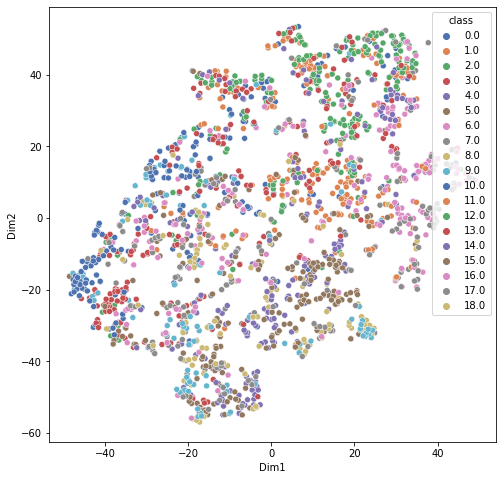

In [181]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2', palette="deep")
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance

comaprsion_df = normalized_data.copy()
scalar_query_features = np.array(query.loc[0][1:8], dtype = 'float32')
descriptors_query_features = np.vstack(np.array(query.loc[0][8:]))
comaprsion_values = {}
for index, row in normalized_data.iterrows():
#     if (index<=165):
#         continue
    #print("id", index)
    scalar_features = np.array(row[1:8], dtype = 'float32')
    descriptor_features = np.vstack(np.array(row[8:]))
    scalar_distance = distance.cosine(scalar_query_features,scalar_features)
    total_descriptor_distance = 0
    for i in range(len(descriptors_query_features)):
        descriptor_query_feature = descriptors_query_features[i]
        descriptor_feature = descriptor_features[i]
        descriptor_distance = wasserstein_distance(descriptor_query_feature,descriptor_feature)
        
        descriptor_distance_scaled = (descriptor_distance - sampled_min_max[i][0]) / (sampled_min_max[i][1] - sampled_min_max[i][0])
        #print(descriptor_distance_std)
        #descriptor_distance_scaled = descriptor_distance_std * (sampled_min_max[i][1] - sampled_min_max[i][0]) + sampled_min_max[i][0]
        
        #print(descriptor_distance, descriptor_distance_scaled)
        #print(descriptor_distance_scaled)
        total_descriptor_distance += descriptor_distance
        total_descriptor_distance = total_descriptor_distance/6
    #print("descriptor",total_descriptor_distance)
    total_distance = scalar_distance + total_descriptor_distance
    
    if np.isnan(total_distance ): 
        comaprsion_values[index] = 999
    else:
        comaprsion_values[index] = total_distance

In [19]:
extract = lambda x: x[0]
pred = list(map(extract,sorted(comaprsion_values.items(), key=lambda x: x[1])[:11]))
pred

[221, 238, 245, 220, 234, 243, 229, 224, 223, 246, 237]

In [261]:
sorted(comaprsion_values.items(), key=lambda x: x[1]) # with sword

[(700, 0.024006779842897737),
 (722, 0.07141625985335354),
 (1786, 0.20690485265166156),
 (721, 0.32709826491097804),
 (687, 0.3453170374313882),
 (679, 0.35443899163084314),
 (1114, 0.35453591060741785),
 (714, 0.35854894639914797),
 (683, 0.36083797634597675),
 (697, 0.36579063108716686),
 (718, 0.36766724953830854),
 (484, 0.37029948312281735),
 (1759, 0.37793412839128215),
 (620, 0.37859023347101445),
 (724, 0.3791688626057324),
 (1761, 0.3855825859990691),
 (711, 0.38637135109543347),
 (678, 0.3873074247380732),
 (669, 0.3914220702182991),
 (144, 0.39268890312826493),
 (175, 0.40607958672130506),
 (200, 0.41474492349783515),
 (1350, 0.4160847939834397),
 (1421, 0.41716269696896197),
 (117, 0.4180035295620887),
 (671, 0.4193443557084677),
 (530, 0.42242762455145577),
 (1530, 0.42274530956456907),
 (485, 0.4228171775564),
 (1532, 0.42895587942857977),
 (1518, 0.4295619359433862),
 (623, 0.42994366126081507),
 (179, 0.4317469282457519),
 (161, 0.43571566215559726),
 (1602, 0.43636749

In [262]:
extract = lambda x: x[0] #  with sword
pred = list(map(extract,sorted(comaprsion_values.items(), key=lambda x: x[1])[:11]))
pred

[700, 722, 1786, 721, 687, 679, 1114, 714, 683, 697, 718]

In [258]:
sorted(comaprsion_values.items(), key=lambda x: x[1]) # with /6 sword

[(700, 0.002509455461867855),
 (1112, 0.00755585915930733),
 (722, 0.012517535312225388),
 (1114, 0.01841859001674714),
 (709, 0.022372465141761014),
 (683, 0.027652624980533155),
 (721, 0.045703762620824866),
 (1786, 0.0517495670231452),
 (485, 0.05414067857590816),
 (484, 0.054368706774437135),
 (1761, 0.05725435475047828),
 (1759, 0.05904122434663595),
 (525, 0.06782234259256321),
 (1678, 0.06963515756450331),
 (710, 0.0700826679320216),
 (482, 0.07024183666232081),
 (1349, 0.07055729355836493),
 (487, 0.07558082817337512),
 (1530, 0.08147152631378195),
 (787, 0.08278539997293625),
 (483, 0.08723982965807989),
 (486, 0.08758417263241976),
 (1518, 0.08967906641541201),
 (1552, 0.08969947001019415),
 (718, 0.09109387662956063),
 (1350, 0.09195948571840831),
 (144, 0.09819753015288495),
 (707, 0.10080917191881252),
 (488, 0.10117290850544289),
 (494, 0.10198953675424417),
 (1553, 0.10200636129955172),
 (423, 0.1041356595769993),
 (96, 0.10429764010600695),
 (97, 0.10636445976893685),
 

In [259]:
extract = lambda x: x[0] # without descriptors
pred = list(map(extract,sorted(comaprsion_values.items(), key=lambda x: x[1])[:11]))
pred

[700, 1112, 722, 1114, 709, 683, 721, 1786, 485, 484, 1761]

In [248]:
sorted(comaprsion_values.items(), key=lambda x: x[1]) # with

[(221, 0.007485287224769396),
 (223, 0.12962050986131263),
 (220, 0.1314945972309393),
 (224, 0.1473298210284795),
 (1236, 0.1515247461561073),
 (105, 0.15818204846748488),
 (229, 0.158612752279846),
 (1203, 0.15900869124117056),
 (1360, 0.16444022073274364),
 (86, 0.17109070228413484),
 (255, 0.17155804057072468),
 (234, 0.17388936653627693),
 (258, 0.1747224977347999),
 (1155, 0.17587946611037253),
 (251, 0.18001643339471357),
 (665, 0.1802504211641865),
 (238, 0.18936377436859067),
 (277, 0.19376922732081012),
 (252, 0.1959270539236741),
 (243, 0.19599259703823055),
 (1473, 0.19629137034178157),
 (230, 0.196411271594797),
 (237, 0.19765186162651474),
 (195, 0.197724309894277),
 (1208, 0.19905775205861187),
 (280, 0.20516298637271216),
 (1375, 0.20877705371877084),
 (1477, 0.21348340791934553),
 (240, 0.21366643901121504),
 (244, 0.21447634638067267),
 (1653, 0.21472964341750583),
 (245, 0.2158529572391909),
 (1245, 0.21657873033720265),
 (222, 0.21907852345931797),
 (278, 0.21930902

In [242]:
sorted(comaprsion_values.items(), key=lambda x: x[1]) # without descriptor

[(221, 0.0),
 (224, 0.0008423924446105957),
 (238, 0.0014781355857849121),
 (245, 0.002356588840484619),
 (234, 0.002938985824584961),
 (243, 0.0030325651168823242),
 (220, 0.0030957460403442383),
 (1307, 0.0037515759468078613),
 (229, 0.004725039005279541),
 (246, 0.004913926124572754),
 (1290, 0.005215764045715332),
 (1473, 0.005439639091491699),
 (223, 0.005885779857635498),
 (1230, 0.006650745868682861),
 (1190, 0.00715714693069458),
 (239, 0.007160305976867676),
 (237, 0.0074007511138916016),
 (258, 0.008039653301239014),
 (250, 0.008519887924194336),
 (1133, 0.008813321590423584),
 (251, 0.008881449699401855),
 (254, 0.008887827396392822),
 (244, 0.008971333503723145),
 (230, 0.008991658687591553),
 (665, 0.009279072284698486),
 (1474, 0.010109007358551025),
 (1315, 0.011610865592956543),
 (1316, 0.011661767959594727),
 (280, 0.012546360492706299),
 (409, 0.012569665908813477),
 (1651, 0.012578010559082031),
 (61, 0.012724339962005615),
 (1475, 0.013383090496063232),
 (236, 0.013

In [251]:
sorted(comaprsion_values.items(), key=lambda x: x[1]) # /6

[(221, 0.0004595805122685732),
 (238, 0.0031768887248071614),
 (245, 0.004275025828411467),
 (220, 0.0044053344728353745),
 (234, 0.00526806176786492),
 (243, 0.005702661012977716),
 (229, 0.006498572524025159),
 (224, 0.007088537374482835),
 (223, 0.0071596953347442755),
 (246, 0.007849698548024241),
 (237, 0.009228839068813501),
 (1290, 0.00986999886377218),
 (1473, 0.0101295142855325),
 (254, 0.01074141969435729),
 (258, 0.01079653234705083),
 (251, 0.010815080258019513),
 (244, 0.01090546042085206),
 (1307, 0.011180978087132167),
 (230, 0.011454326628332836),
 (665, 0.011904553831558907),
 (239, 0.011922005827593455),
 (1230, 0.012160534642021152),
 (250, 0.012689518587907086),
 (1190, 0.012874032048110117),
 (1133, 0.013261222501588513),
 (280, 0.014368794347211078),
 (1474, 0.015041421746360199),
 (1651, 0.015958390287718116),
 (1315, 0.01636452599585522),
 (61, 0.017193856281067427),
 (1203, 0.01819439590358812),
 (236, 0.018502096768788483),
 (1291, 0.018570687274739203),
 (240

In [249]:
extract = lambda x: x[0] # with
pred = list(map(extract,sorted(comaprsion_values.items(), key=lambda x: x[1])[:11]))
pred

[221, 223, 220, 224, 1236, 105, 229, 1203, 1360, 86, 255]

In [243]:
extract = lambda x: x[0] # without descriptors
pred = list(map(extract,sorted(comaprsion_values.items(), key=lambda x: x[1])[:11]))
pred

[221, 224, 238, 245, 234, 243, 220, 1307, 229, 246, 1290]

In [252]:
extract = lambda x: x[0] # /6
pred = list(map(extract,sorted(comaprsion_values.items(), key=lambda x: x[1])[:30]))
pred

[221,
 238,
 245,
 220,
 234,
 243,
 229,
 224,
 223,
 246,
 237,
 1290,
 1473,
 254,
 258,
 251,
 244,
 1307,
 230,
 665,
 239,
 1230,
 250,
 1190,
 1133,
 280,
 1474,
 1651,
 1315,
 61]

In [207]:
comaprsion_values[:11]

TypeError: unhashable type: 'slice'

In [57]:
comaprsion_df = normalized_data.copy()

for idx, column in enumerate(normalized_data.columns[8:]):
    comaprsion_df[column] = [standardize(wasserstein_distance(row, query[column][0]), idx) for row in normalized_data[column]]

In [58]:
comaprsion_df

,id,surface_area,volume,compactness,sphericity,diameter,rectangulairty,eccentricity,curvature,A3,D1,D2,D3,D4
0,0,-0.583110,-0.039329,-0.116012,0.230250,1.0,-0.109650,-0.026311,0.706911,3.070764,-1.057928,-0.226524,1.880901,-0.226722
1,1,-0.640930,-0.415322,-0.118042,0.272779,1.0,0.097077,-0.026489,-0.202784,2.873449,-0.828880,0.420700,0.384816,-0.263937
2,2,-0.603237,-0.095673,-0.118419,0.280905,1.0,-0.043228,-0.026263,0.035338,2.795507,-0.351252,0.163516,0.921000,-0.775330
3,3,-0.520618,0.392970,-0.119893,0.313312,1.0,-0.468747,-0.026398,-0.478161,3.147285,-0.917406,-0.361934,1.740425,-0.259657
4,4,-0.724641,-0.475575,-0.095315,-0.114249,1.0,-0.306213,-0.026249,0.507394,2.988533,-0.355128,-0.083178,1.036771,-0.198301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,1809,-0.365028,-0.011320,-0.113034,0.171236,1.0,-0.081913,-0.026487,-0.539549,3.298097,-0.675248,-0.387057,1.588114,0.908072
1810,1810,-0.089583,0.813581,-0.138504,0.844492,1.0,-0.125955,-0.026451,-0.624279,3.193066,0.234825,0.118912,2.135730,-0.205266
1811,1811,-0.509943,-0.716180,-0.046532,-0.572259,1.0,-0.403390,-0.026294,0.307365,2.919810,0.003639,-0.285808,-0.104959,-0.092936
1812,1812,0.413064,1.070660,-0.142995,1.019764,1.0,-0.306231,-0.026260,0.174479,3.067702,-1.141324,-0.664696,0.904675,0.120963


In [62]:
query

,id,surface_area,volume,compactness,sphericity,diameter,rectangulairty,eccentricity,curvature,A3,D1,D2,D3,D4
0,700,-0.88173,-0.955698,-0.121938,0.360174,1.0,0.919625,-0.025173,"[0.03635432667690732, 0.10291858678955453, 0.0...","[0.5516667001143912, 0.053984627425796225, 0.0...","[0.08908466956992916, 0.08348552048004174, 0.2...","[0.25469104336831966, 0.17146641513977803, 0.1...","[0.6807481587027635, 0.2080916735234502, 0.064...","[0.1675329627325453, 0.400309056974854, 0.2538..."


In [61]:
comparsion_values
for index, row in comaprsion_df.iterrows():
    print(np.array(row))
    break

[0 -0.5831101237599363 -0.03932929737226567 -0.11601175922170077
 0.23024995347041788 1.0 -0.10965035693340158 -0.026310896738086852
 0.706911005032727 3.0707642122386076 -1.0579284895225902
 -0.22652434359352122 1.880901265779298 -0.22672185560580194]


In [55]:
a = np.array(query.iloc[:, 1:8])[0]
b = np.array(normalized_data.iloc[:, 1:8])[700]
a,b

(array([-0.8817296 , -0.95569794, -0.12193839,  0.36017435,  1.        ,
         0.91962453, -0.0251731 ]),
 array([-0.8817296 , -0.95569794, -0.12193839,  0.36017435,  1.        ,
         0.91962453, -0.0251731 ]))

In [56]:
from scipy.spatial import distance
distance.cosine(a,b)

0.0

In [16]:
comaprsion_df = normalized_data.copy()
for column in query.columns[1:8]:
    comaprsion_df[column] = normalized_data[column] - query[column][0]

for idx, column in enumerate(normalized_data.columns[8:]):
    comaprsion_df[column] = [standardize(wasserstein_distance(row, query[column][0]), idx) for row in normalized_data[column]]

In [18]:
comaprsion_df

,id,surface_area,volume,compactness,sphericity,diameter,rectangulairty,eccentricity,curvature,A3,D1,D2,D3,D4
0,0,0.298619,0.916369,0.005927,-0.129924,0.0,-1.029275,-0.001138,0.706911,3.070764,-1.057928,-0.226524,1.880901,-0.226722
1,1,0.240800,0.540376,0.003897,-0.087395,0.0,-0.822548,-0.001316,-0.202784,2.873449,-0.828880,0.420700,0.384816,-0.263937
2,2,0.278493,0.860025,0.003519,-0.079269,0.0,-0.962853,-0.001090,0.035338,2.795507,-0.351252,0.163516,0.921000,-0.775330
3,3,0.361112,1.348668,0.002045,-0.046862,0.0,-1.388371,-0.001225,-0.478161,3.147285,-0.917406,-0.361934,1.740425,-0.259657
4,4,0.157089,0.480123,0.026624,-0.474424,0.0,-1.225838,-0.001076,0.507394,2.988533,-0.355128,-0.083178,1.036771,-0.198301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,1809,0.516702,0.944378,0.008904,-0.188938,0.0,-1.001538,-0.001314,-0.539549,3.298097,-0.675248,-0.387057,1.588114,0.908072
1810,1810,0.792147,1.769279,-0.016565,0.484318,0.0,-1.045580,-0.001278,-0.624279,3.193066,0.234825,0.118912,2.135730,-0.205266
1811,1811,0.371786,0.239518,0.075407,-0.932433,0.0,-1.323014,-0.001121,0.307365,2.919810,0.003639,-0.285808,-0.104959,-0.092936
1812,1812,1.294793,2.026358,-0.021057,0.659590,0.0,-1.225855,-0.001086,0.174479,3.067702,-1.141324,-0.664696,0.904675,0.120963


In [19]:
comaprsion_df = comaprsion_df.drop('id', axis=1)

In [28]:
comaprsion_df

,surface_area,volume,compactness,sphericity,diameter,rectangulairty,eccentricity,curvature,A3,D1,D2,D3,D4
0,0.298619,0.916369,0.005927,-0.129924,0.0,-1.029275,-0.001138,0.706911,3.070764,-1.057928,-0.226524,1.880901,-0.226722
1,0.240800,0.540376,0.003897,-0.087395,0.0,-0.822548,-0.001316,-0.202784,2.873449,-0.828880,0.420700,0.384816,-0.263937
2,0.278493,0.860025,0.003519,-0.079269,0.0,-0.962853,-0.001090,0.035338,2.795507,-0.351252,0.163516,0.921000,-0.775330
3,0.361112,1.348668,0.002045,-0.046862,0.0,-1.388371,-0.001225,-0.478161,3.147285,-0.917406,-0.361934,1.740425,-0.259657
4,0.157089,0.480123,0.026624,-0.474424,0.0,-1.225838,-0.001076,0.507394,2.988533,-0.355128,-0.083178,1.036771,-0.198301
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,0.516702,0.944378,0.008904,-0.188938,0.0,-1.001538,-0.001314,-0.539549,3.298097,-0.675248,-0.387057,1.588114,0.908072
1810,0.792147,1.769279,-0.016565,0.484318,0.0,-1.045580,-0.001278,-0.624279,3.193066,0.234825,0.118912,2.135730,-0.205266
1811,0.371786,0.239518,0.075407,-0.932433,0.0,-1.323014,-0.001121,0.307365,2.919810,0.003639,-0.285808,-0.104959,-0.092936
1812,1.294793,2.026358,-0.021057,0.659590,0.0,-1.225855,-0.001086,0.174479,3.067702,-1.141324,-0.664696,0.904675,0.120963


In [31]:
comparsion_values = comaprsion_df.apply(np.linalg.norm, axis=1)
comparsion_values.sort_values(ascending=True)

718      1.546430
620      1.827039
1577     1.981575
1786     2.055974
697      2.077597
          ...    
704     20.131620
560     20.187788
1692    38.648202
1707    42.732196
166           NaN
Length: 1814, dtype: float64

In [32]:
comparsion_values = comaprsion_df.sum(axis = 1, skipna = True)
comparsion_values.sort_values(ascending=True)

687     -9.082920
700     -8.837959
722     -7.963649
1783    -6.811513
636     -6.527453
          ...    
560     25.688865
704     30.593658
84      31.410962
1692    35.885708
1707    44.011062
Length: 1814, dtype: float64

In [564]:
comaprsion_df.describe()

,surface_area,volume,compactness,sphericity,diameter,rectangulairty,eccentricity,curvature,A3,D1,D2,D3,D4
count,1814.000000,1814.000000,1814.000000,1814.000000,1814.0,1814.000000,1813.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000
mean,0.588866,0.504440,0.005640,0.784274,0.0,0.403296,0.026324,1.215862,-0.187769,0.138782,0.202479,-0.132144,-0.280317
std,1.000276,1.000276,1.000276,1.000276,0.0,1.000276,1.000276,1.121622,0.585559,1.141851,1.027968,1.069507,0.761823
min,-0.350812,-0.451257,-0.191027,-0.822044,0.0,-1.478186,-0.000168,-1.841863,-1.509682,-1.636835,-1.503336,-1.649351,-1.289327
25%,-0.006678,-0.202018,-0.121928,0.152121,0.0,-0.188722,-0.000162,0.521575,-0.646236,-0.734160,-0.484667,-0.961155,-0.679493
50%,0.295789,0.132908,-0.093812,0.728173,0.0,0.242485,-0.000137,1.459475,-0.169690,-0.102883,-0.042313,-0.434048,-0.447976
75%,0.837997,0.921425,-0.031136,1.286046,0.0,0.792199,-0.000042,2.100986,0.232058,0.788649,0.594900,0.443569,-0.108679
max,19.325962,7.189479,38.288247,17.075289,0.0,13.815189,42.387499,3.074064,4.046008,4.631338,5.415124,3.514023,5.329263


In [566]:
normalized_data.describe()

,surface_area,volume,compactness,sphericity,diameter,rectangulairty,eccentricity
count,1.814000e+03,1.814000e+03,1.814000e+03,1.814000e+03,1814.0,1.814000e+03,1.813000e+03
mean,-6.267191e-17,-5.483792e-17,-1.566798e-17,-1.175098e-16,1.0,3.133595e-17,-1.567662e-17
std,1.000276e+00,1.000276e+00,1.000276e+00,1.000276e+00,0.0,1.000276e+00,1.000276e+00
min,-9.396772e-01,-9.556979e-01,-1.966668e-01,-1.606318e+00,1.0,-1.881482e+00,-2.649182e-02
25%,-5.955436e-01,-7.064586e-01,-1.275672e-01,-6.321529e-01,1.0,-5.920179e-01,-2.648564e-02
50%,-2.930762e-01,-3.715324e-01,-9.945174e-02,-5.610093e-02,1.0,-1.608111e-01,-2.646072e-02
75%,2.491312e-01,4.169846e-01,-3.677571e-02,5.017720e-01,1.0,3.889033e-01,-2.636570e-02
max,1.873710e+01,6.685038e+00,3.828261e+01,1.629102e+01,1.0,1.341189e+01,4.236118e+01
